In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set_theme(style='white')

In [3]:
fmd = pd.read_csv("fmd_data.csv")
fmd['baseline diameter'] *= 10
fmd['post-occlusion diameter'] *= 10
fmd['fmd'] *= 100
fmd

,subject,baseline diameter,post-occlusion diameter,fmd,class,arterial peak time
0,ASCI004,2.639992,2.773530,5.058243,sci,54.766743
1,ASCI005,4.733801,5.140481,8.590967,sci,102.096656
2,ASCI006,2.810956,2.995261,6.556692,sci,72.260048
3,ASCI007,3.485632,3.884266,11.436476,sci,50.833787
4,ASCI008,3.869011,4.285889,10.774792,sci,65.795438
5,ASCI009,3.818209,3.843897,0.672763,sci,85.843417
6,ASCI010,3.252340,3.718008,14.317939,sci,79.521432
7,ASCI011,3.934928,4.213032,7.067568,sci,60.404403
8,ASCI012,3.107527,3.733968,20.158841,sci,54.875781
9,ASCI013,4.378986,4.650184,6.193180,sci,97.270583


In [4]:
shear = pd.read_csv("shear_data.csv")
shear

,subject,baseline shear,post-occlusion shear,shear flat increase,shear increase,class
0,ASCI005,421.186000,630.070,208.884000,0.495942,sci
1,ASCI006,624.493333,753.570,129.076667,0.206690,sci
2,ASCI007,618.280000,1261.600,643.320000,1.040499,sci
3,ASCI008,490.977500,993.984,503.006500,1.024500,sci
4,ASCI009,635.041667,1229.460,594.418333,0.936030,sci
5,ASCI010,363.867500,827.108,463.240500,1.273102,sci
6,ASCI011,847.565000,771.628,-75.937000,-0.089594,sci
7,ASCI012,1087.577143,1560.320,472.742857,0.434675,sci
8,ASCI013,410.953750,525.148,114.194250,0.277876,sci
9,ASCI014,1148.000000,1539.720,391.720000,0.341220,sci


In [5]:
data = pd.merge(fmd, shear, on = ['subject', 'class'])
data['fmd / shear'] = data['fmd'] / data['shear increase']
data

,subject,baseline diameter,post-occlusion diameter,fmd,class,arterial peak time,baseline shear,post-occlusion shear,shear flat increase,shear increase,fmd / shear
0,ASCI005,4.733801,5.140481,8.590967,sci,102.096656,421.186000,630.070,208.884000,0.495942,17.322509
1,ASCI006,2.810956,2.995261,6.556692,sci,72.260048,624.493333,753.570,129.076667,0.206690,31.722313
2,ASCI007,3.485632,3.884266,11.436476,sci,50.833787,618.280000,1261.600,643.320000,1.040499,10.991333
3,ASCI008,3.869011,4.285889,10.774792,sci,65.795438,490.977500,993.984,503.006500,1.024500,10.517121
4,ASCI009,3.818209,3.843897,0.672763,sci,85.843417,635.041667,1229.460,594.418333,0.936030,0.718740
5,ASCI010,3.252340,3.718008,14.317939,sci,79.521432,363.867500,827.108,463.240500,1.273102,11.246497
6,ASCI011,3.934928,4.213032,7.067568,sci,60.404403,847.565000,771.628,-75.937000,-0.089594,-78.884120
7,ASCI012,3.107527,3.733968,20.158841,sci,54.875781,1087.577143,1560.320,472.742857,0.434675,46.376787
8,ASCI013,4.378986,4.650184,6.193180,sci,97.270583,410.953750,525.148,114.194250,0.277876,22.287556
9,ASCI014,3.289285,3.273312,-0.485611,sci,58.623520,1148.000000,1539.720,391.720000,0.341220,-1.423163


# Attaching Metadata

In [6]:
metadata = pd.read_csv('subj_metadata.csv').dropna(subset= "ASCI#").iloc[4:-1]
metadata.reset_index(inplace=True, drop = True)
metadata.rename(columns={"ASCI#" : "subject"}, inplace=True)
data = data.merge(metadata, on = "subject")

In [7]:
data.at[11, 'AIS'] = 'B'
data['AIS'].fillna("control", inplace = True)
data['AIS']

C:\Users\M315697\AppData\Local\Temp\ipykernel_19936\727110936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AIS'].fillna("control", inplace = True)


0           A
1           A
2           A
3           A
4           A
5           A
6           B
7           D
8           A
9           B
10          A
11          B
12          B
13          C
14          A
15          B
16          A
17          A
18          A
19          B
20    control
21    control
22    control
23    control
24    control
25    control
26    control
27    control
28    control
29    control
30    control
31    control
32    control
33    control
Name: AIS, dtype: object

In [8]:
data = data.dropna(subset = "shear increase")
data

,subject,baseline diameter,post-occlusion diameter,fmd,class,arterial peak time,baseline shear,post-occlusion shear,shear flat increase,shear increase,...,UTI 1y,Bowel Prog time,PI hx,1y hosp,AD,AD -ADFSCI,OH,OH ADFSCI,ADFSCI tot,notes
0,ASCI005,4.733801,5.140481,8.590967,sci,102.096656,421.186000,630.070,208.884000,0.495942,...,2,55,2.0,1,yes,14.0,yes,5.0,19.0,NaN
1,ASCI006,2.810956,2.995261,6.556692,sci,72.260048,624.493333,753.570,129.076667,0.206690,...,4,52,1.0,1,yes,18.0,yes,13.0,31.0,NaN
2,ASCI007,3.485632,3.884266,11.436476,sci,50.833787,618.280000,1261.600,643.320000,1.040499,...,7,90,2.0,0,yes,90.0,yes,0.0,90.0,NaN
3,ASCI008,3.869011,4.285889,10.774792,sci,65.795438,490.977500,993.984,503.006500,1.024500,...,0,40,0.0,0,No,2.0,no,3.0,5.0,NaN
4,ASCI009,3.818209,3.843897,0.672763,sci,85.843417,635.041667,1229.460,594.418333,0.936030,...,0,45,0.0,0,yes,13.0,yes,5.0,18.0,NaN
5,ASCI010,3.252340,3.718008,14.317939,sci,79.521432,363.867500,827.108,463.240500,1.273102,...,0,90,0.0,0,yes,20.0,yes,23.0,43.0,NaN
6,ASCI011,3.934928,4.213032,7.067568,sci,60.404403,847.565000,771.628,-75.937000,-0.089594,...,0,60,1.0,0,yes,7.0,yes,5.0,12.0,NaN
7,ASCI012,3.107527,3.733968,20.158841,sci,54.875781,1087.577143,1560.320,472.742857,0.434675,...,0,30,0.0,0,no,5.0,no,2.0,7.0,NaN
8,ASCI013,4.378986,4.650184,6.193180,sci,97.270583,410.953750,525.148,114.194250,0.277876,...,0,75,0.0,0,yes,35.0,yes,11.0,46.0,NaN
9,ASCI014,3.289285,3.273312,-0.485611,sci,58.623520,1148.000000,1539.720,391.720000,0.341220,...,2,90,3.0,0,yes,91.0,yes,42.0,133.0,"had a lot of AD first year, 6 admissions for U..."


# Population Comparison Plots

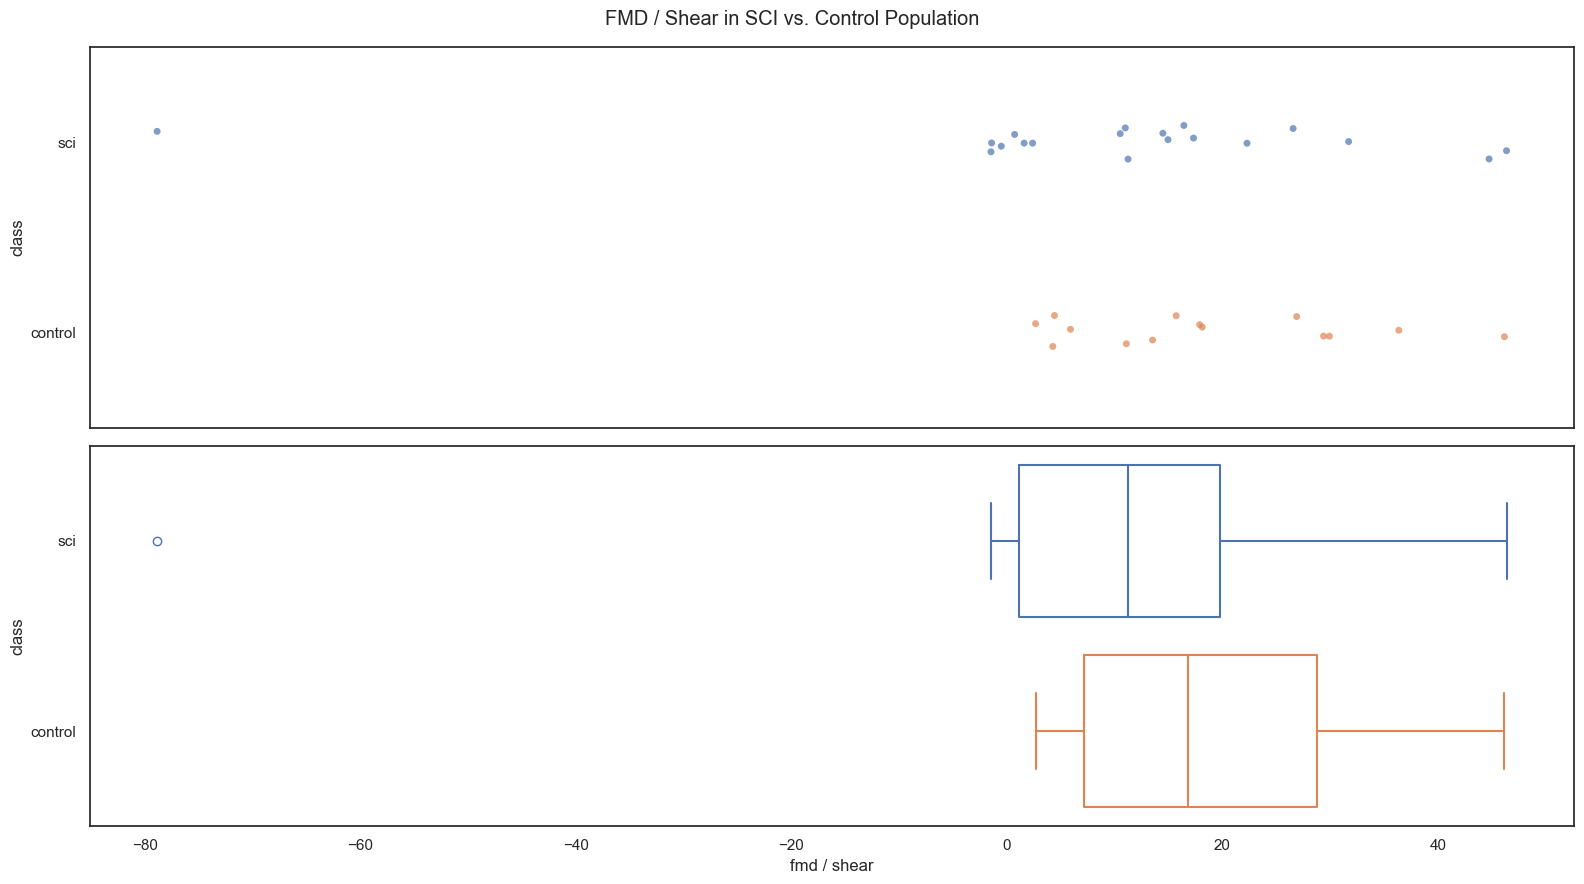

In [9]:
fig, ax = plt.subplots(2,1, sharey=True, sharex = True, figsize = (16,9))
sns.stripplot(data = data, hue = "class", y = "class", x = "fmd / shear", ax = ax[0], alpha =0.7)
sns.boxplot(data = data, hue = "class", y = "class", x = "fmd / shear", ax = ax[1], fill = None)
plt.suptitle("FMD / Shear in SCI vs. Control Population")
plt.tight_layout()

In [10]:
sci = data[data['class'] == 'sci']['fmd / shear']
control = data[data['class'] == 'control']['fmd / shear']
t_stat, p_val = sp.stats.ttest_ind(sci, control)

print(f"T-Statistic: {t_stat:0.3f}")
print(f"P-Value: {p_val:0.3f}")

T-Statistic: -1.153
P-Value: 0.258


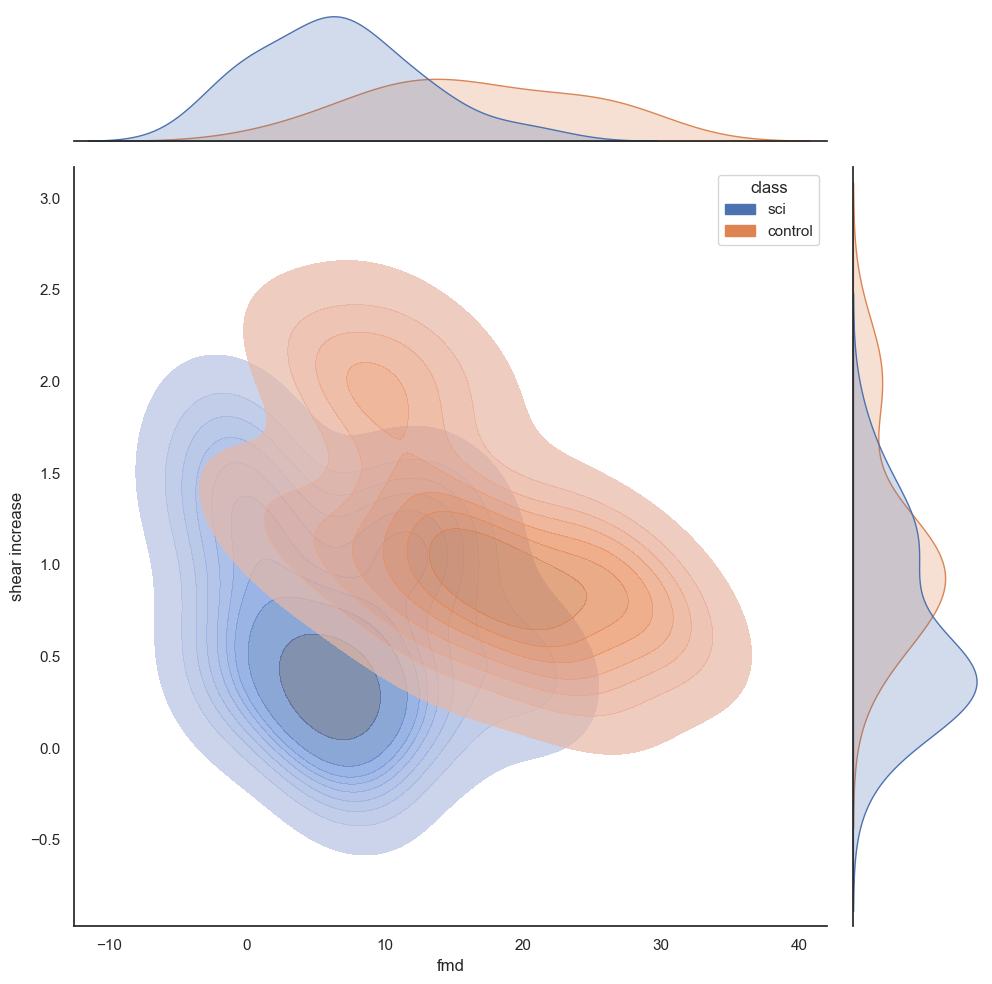

In [11]:
sns.jointplot(data = data, y = 'shear increase', x = 'fmd', hue = 'class', height= 10, kind = 'kde', fill = True, alpha = 0.7)

c:\Users\M315697\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\M315697\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


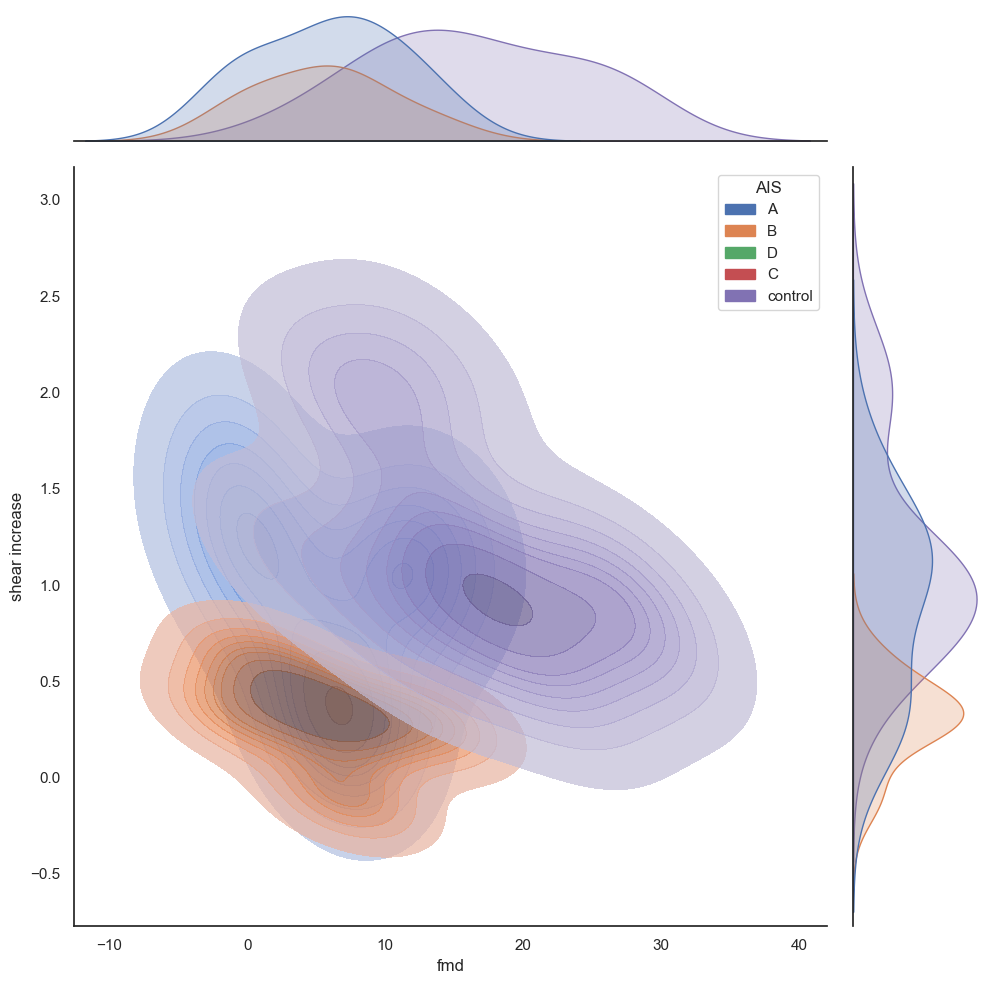

In [12]:
sns.jointplot(data = data, y = 'shear increase', x = 'fmd', hue = 'AIS', height= 10, kind = 'kde', fill = True, alpha = 0.7)

## Scatterplots and Regression Lines

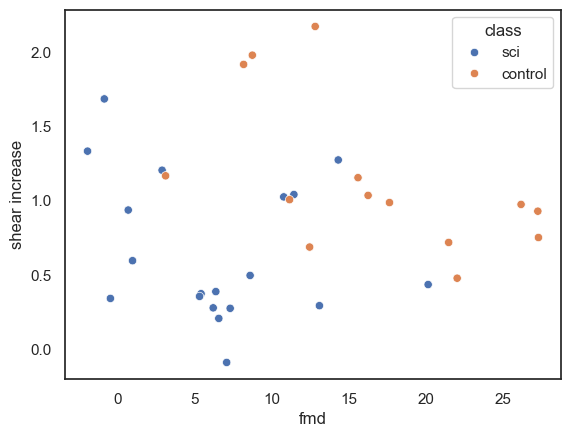

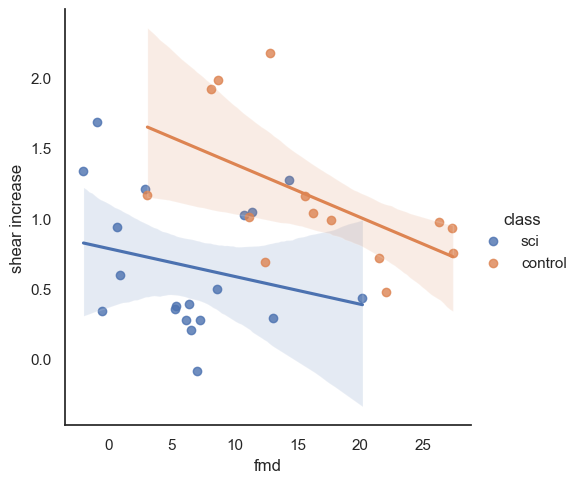

<Axes: xlabel='fmd', ylabel='shear increase'>

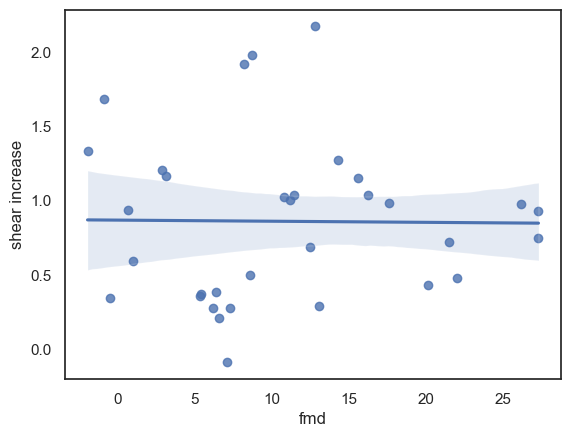

In [13]:
sns.scatterplot(data = data, x = 'fmd', y = 'shear increase', hue = 'class')
plt.show()
sns.lmplot(data = data, x = 'fmd', y = 'shear increase', hue = 'class')
plt.show()
sns.regplot(data = data, x = 'fmd', y = 'shear increase')

## PCA Exploration

<Axes: >

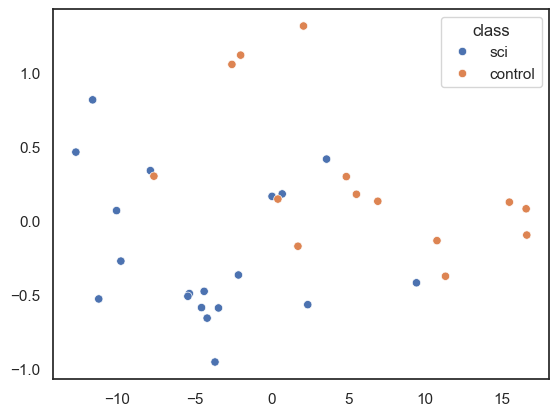

In [14]:
from sklearn import decomposition

pca_data = decomposition.PCA(2).fit_transform(data[['fmd', 'shear increase']])

sns.scatterplot(x = pca_data[:, 0], y = pca_data[:, 1], hue = data['class'])

<Axes: xlabel='fmd', ylabel='ADFSCI tot'>

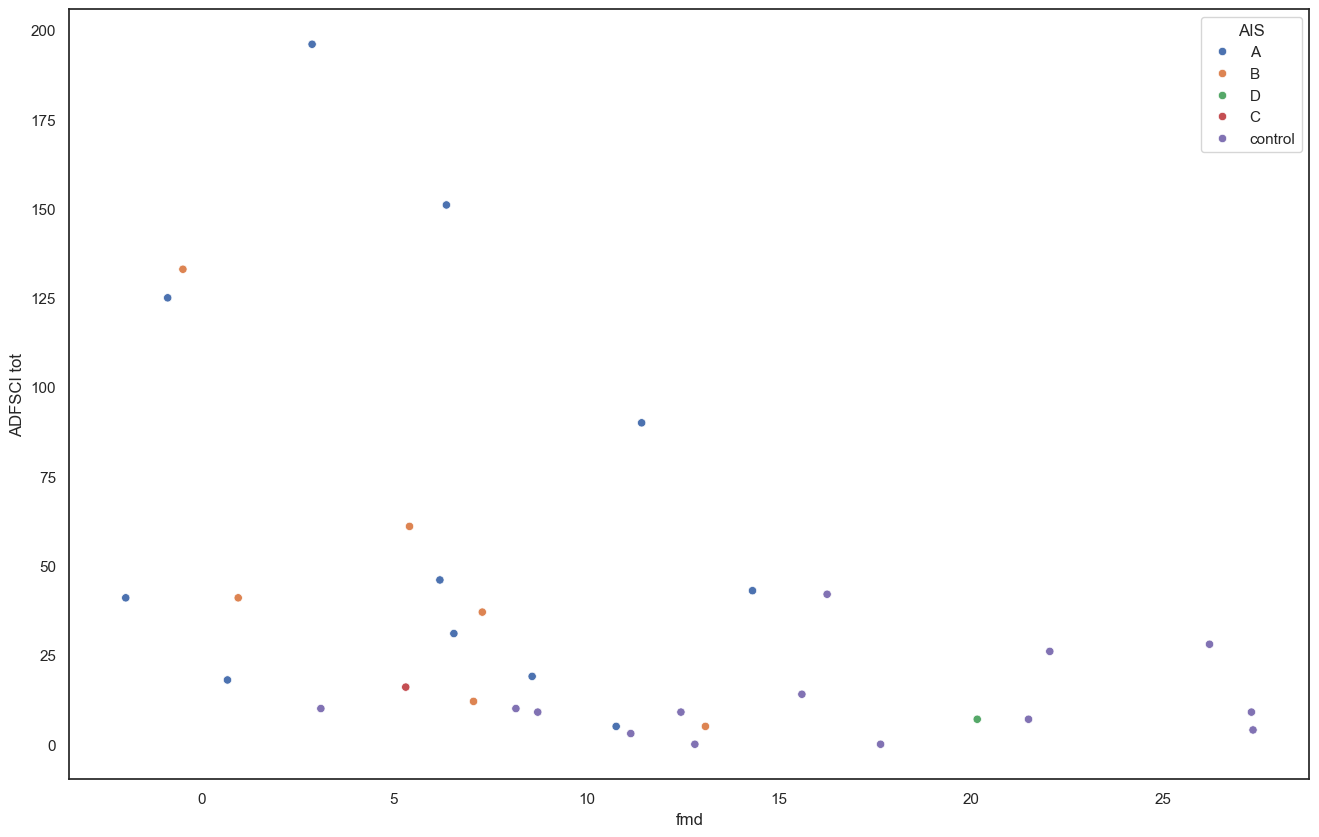

In [15]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = data, x = 'fmd', y = 'ADFSCI tot', hue = 'AIS')

## Pearson Coefficients 

In [16]:
from scipy.stats import pearsonr

r_control, p_control = pearsonr(x = data[data['AIS'] == 'control']['fmd'], y = data[data['AIS'] == 'control']['ADFSCI tot'])
print(f"Pearson Coefficient: {r_control:0.3f}, p-value: {p_control:0.3f}")

Pearson Coefficient: 0.201, p-value: 0.490


In [17]:
r_sci, p_sci = pearsonr(x = data[data['AIS'] != 'control']['fmd'], y = data[data['AIS'] != 'control']['ADFSCI tot'])
print(f"Pearson Coefficient: {r_control:0.3f}, p-value: {p_control:0.3f}")

Pearson Coefficient: 0.201, p-value: 0.490


In [18]:
r_A, p_A = pearsonr(x = data[data['AIS'] == 'A']['fmd'], y = data[data['AIS'] == 'A']['ADFSCI tot'])
print(f"Pearson Coefficient: {r_control:0.3f}, p-value: {p_control:0.3f}")

Pearson Coefficient: 0.201, p-value: 0.490


In [19]:
r_B, p_B = pearsonr(x = data[data['AIS'] == 'B']['fmd'], y = data[data['AIS'] == 'B']['ADFSCI tot'])
print(f"Pearson Coefficient: {r_control:0.3f}, p-value: {p_control:0.3f}")

Pearson Coefficient: 0.201, p-value: 0.490


Text(0.5, 1.0, '$R^2$ and $p$-value for FMD vs. ADFSCI, grouped by AIS')

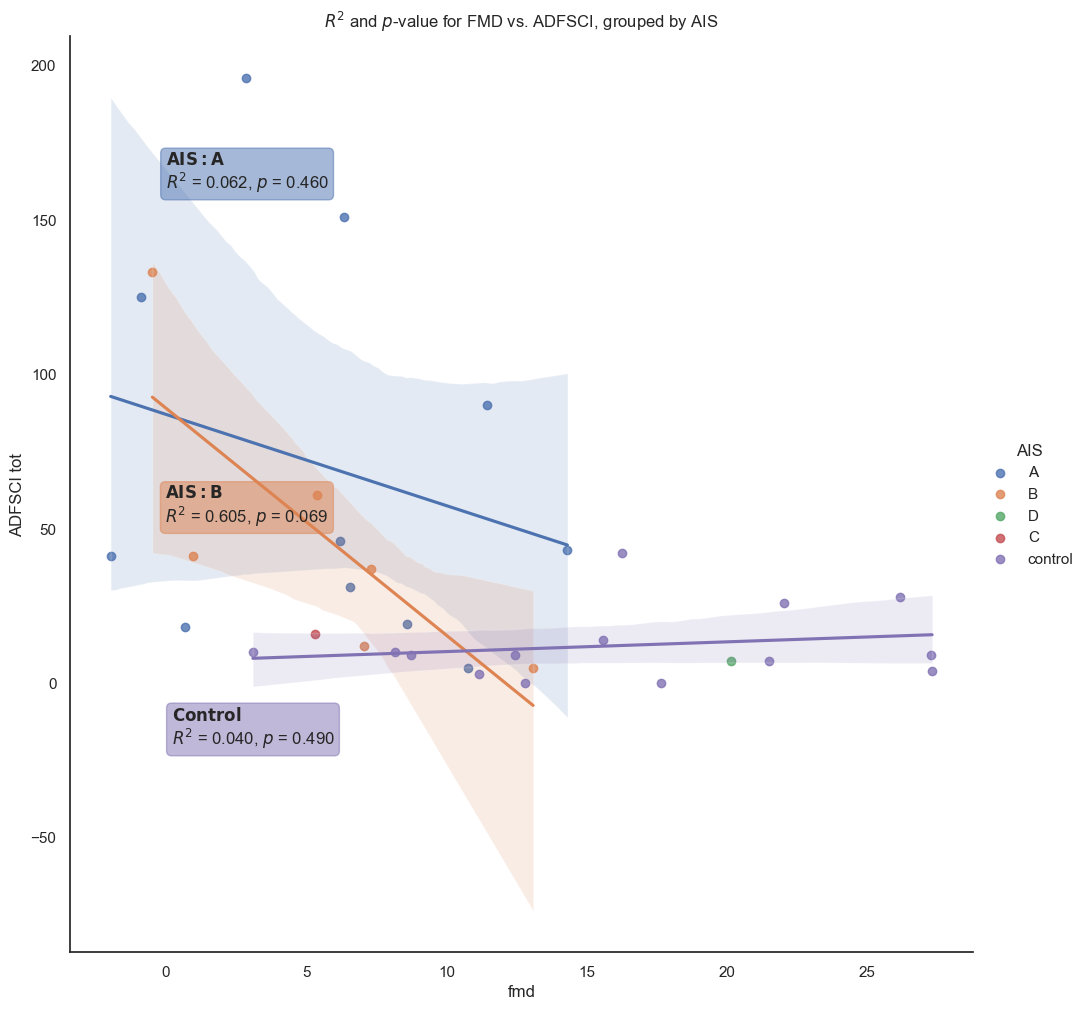

In [20]:
sns.lmplot(data = data, x = 'fmd', y = 'ADFSCI tot', hue = 'AIS', height=10)

props = lambda color: dict(boxstyle='round', facecolor= color, alpha=0.5, edgecolor = color)
coefficient_text = lambda label, r, p: f"$\\bf {label}$" + f"\n$R^2$ = {r:0.3f}, $p$ = {p:0.3f}"

# plt.annotate("$\\bf {Control}$" + f"\n$R^2$ = {r_control:0.3f}, $p$ = {p_control:0.3f}", xy = (0.20, -20), bbox = props('#8172b3'))
plt.annotate(coefficient_text("Control", r_control**2, p_control), xy = (0.20, -20), bbox = props('#8172b3'))
plt.annotate(coefficient_text("AIS: A", r_A**2, p_A), xy = (-0.01, 160), bbox = props('#4c72b0'))
plt.annotate(coefficient_text("AIS: B", r_B**2, p_B), xy = (-0.02, 52), bbox = props('#dd8452'))
plt.title("$R^2$ and $p$-value for FMD vs. ADFSCI, grouped by AIS")

Text(0.5, 1.0, '$R^2$ and $p$-value for FMD vs. ADFSCI in SCI and Control population')

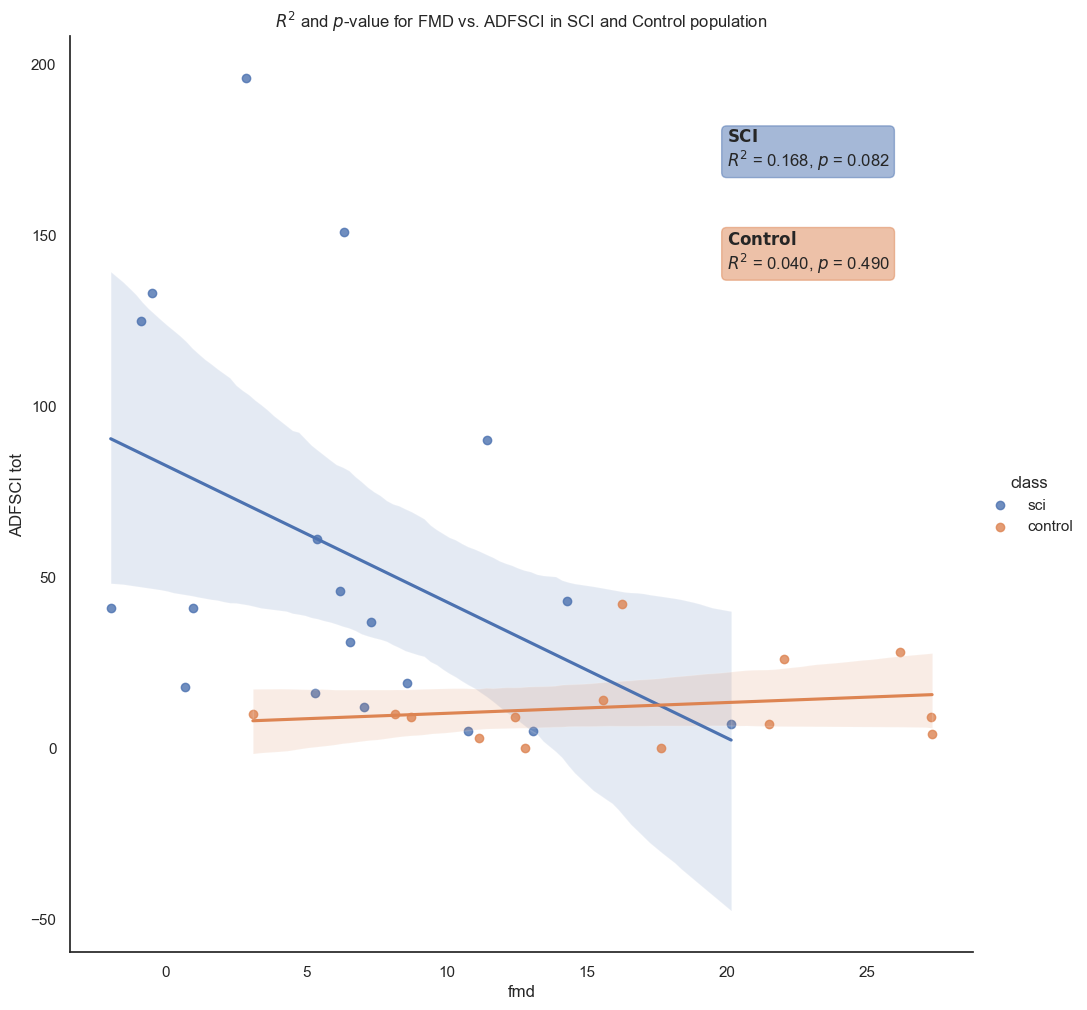

In [21]:
sns.lmplot(data = data, x = 'fmd', y = 'ADFSCI tot', hue = 'class', height=10)

props = lambda color: dict(boxstyle='round', facecolor= color, alpha=0.5, edgecolor = color)
plt.annotate(coefficient_text("Control", r_control**2, p_control), xy = (20, 140), bbox = props('#dd8452'))
plt.annotate(coefficient_text("SCI", r_sci**2, p_sci), xy = (20, 170), bbox = props('#4c72b0'))
plt.title("$R^2$ and $p$-value for FMD vs. ADFSCI in SCI and Control population")

# Mann-Whitney U Tests and T-Tests

In [22]:
mannwhitney = lambda column: sp.stats.mannwhitneyu(data[data['class'] == 'sci'][column], data[data['class'] == 'control'][column]) 
ttest =  lambda column: sp.stats.ttest_ind(data[data['class'] == 'sci'][column], data[data['class'] == 'control'][column])
box = lambda column: sns.boxplot(data= data, x = column, y = 'class', hue = 'class')
mean_std = lambda column: ((data[data['class'] == 'sci'][column].mean(), data[data['class'] == 'sci'][column].std()),
                           (data[data['class'] == 'control'][column].mean(), data[data['class'] == 'control'][column].std()))
print(mean_std('baseline diameter'))


def compare(column: str):
    print(f"Mann-Whitney U: {mannwhitney(column)[1]}")
    print(f"T-Test: {ttest(column)[1]}")
    
    print(f"SCI: {mean_std(column)[0][0]} +- {mean_std(column)[0][1]}")
    print(f"Control: {mean_std(column)[1][0]} +- {mean_std(column)[1][1]}")
    box(column)
    # plt.show()

((3.6103211614425006, 0.5836953280776087), (3.375068778319547, 0.43633382823483835))


Mann-Whitney U: 0.003781217496179431
T-Test: 0.004389417118454541
SCI: 423.6013367959372 +- 291.09501545199726
Control: 710.3914825249939 +- 223.75482134859766


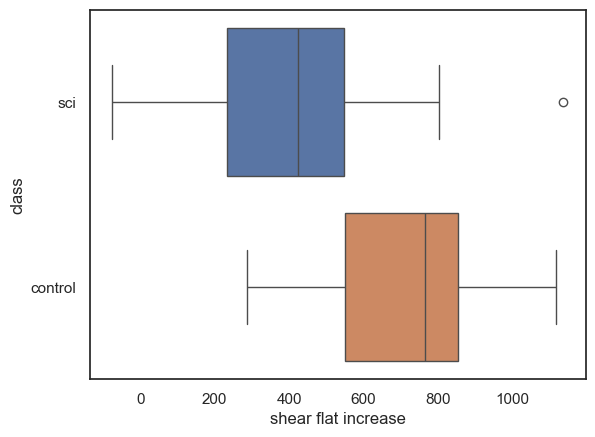

In [23]:
compare('shear flat increase')

Mann-Whitney U: 0.0017186218929538487
T-Test: 0.006485435446826259
SCI: 56.68421052631579 +- 55.84905513134781
Control: 12.214285714285714 +- 11.92398082358902


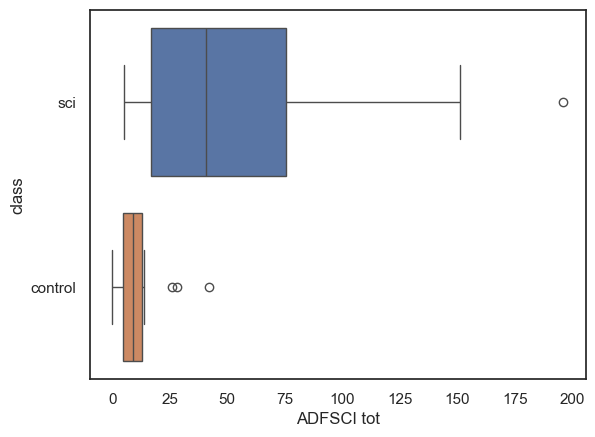

In [24]:
compare('ADFSCI tot')

the diameter measurements will have less statistical power than before because subject ASCI019 is missing from the data set currently because it did not have shear data

Mann-Whitney U: 0.0005039013870345772
T-Test: 0.00016739230326330952
SCI: 6.511483713439368 +- 5.748613786675765
Control: 16.449085299500315 +- 7.611028239376155


Text(0.5, 0, 'Flow Mediated Dilation (%)')

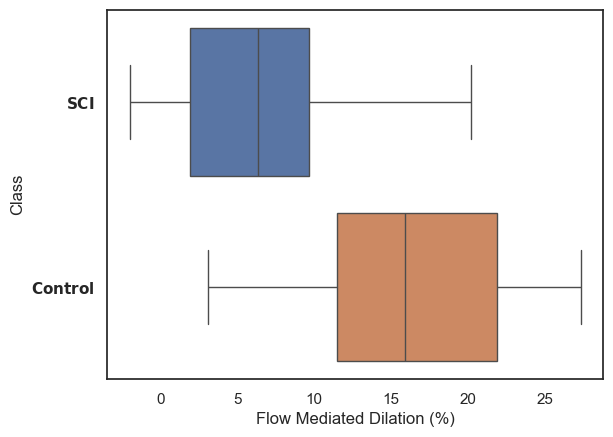

In [25]:
compare('fmd')
plt.ylabel("Class")
plt.yticks([0,1], [ "$\\bf {SCI}$", "$\\bf {Control}$"])
plt.xlabel("Flow Mediated Dilation (%)")

Mann-Whitney U: 0.006653038748713632
T-Test: 0.004395508366437058
SCI: 67.05372382867064 +- 16.854748162211397
Control: 50.75130617908298 +- 12.154916309450568


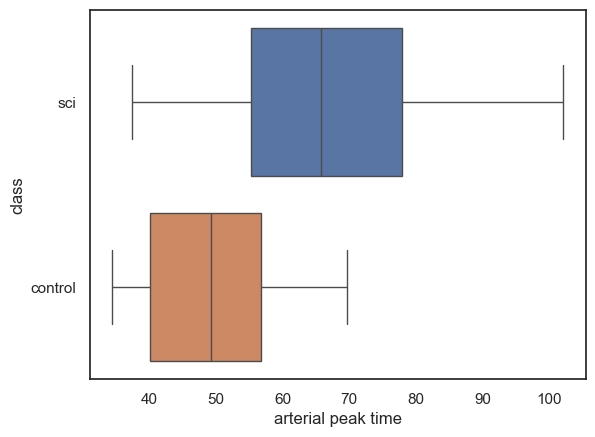

In [26]:
compare('arterial peak time')


Mann-Whitney U: 0.8697968219057861
T-Test: 0.8506493577213106
SCI: 710.3360316251154 +- 257.1480305505831
Control: 692.8316603321489 +- 267.9759378149993


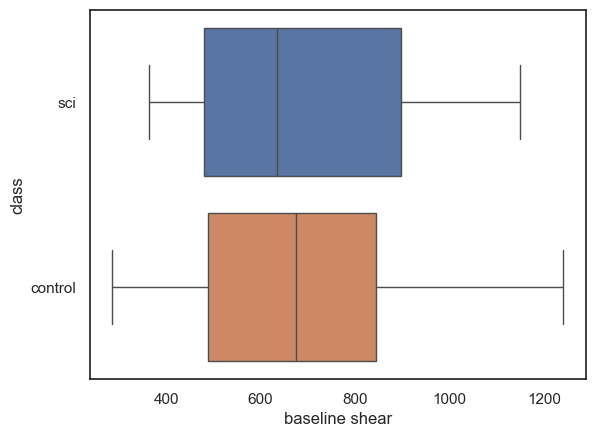

In [27]:
compare('baseline shear')

Mann-Whitney U: 0.2992056811042447
T-Test: 0.21440622687907046
SCI: 3.6103211614425006 +- 0.5836953280776087
Control: 3.375068778319547 +- 0.43633382823483835


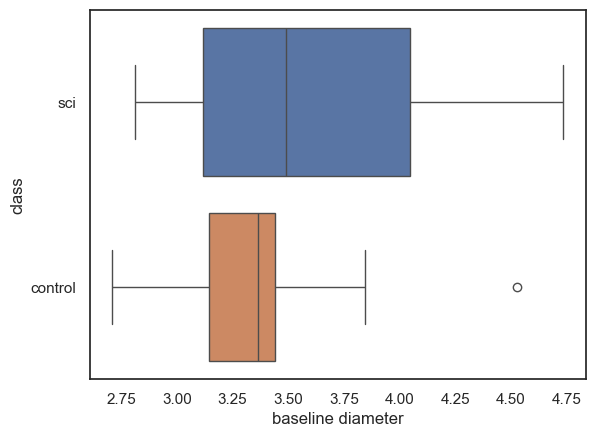

In [28]:
compare('baseline diameter')

Mann-Whitney U: 0.7293080741842375
T-Test: 0.713908884620766
SCI: 3.8425520097745234 +- 0.6297441043138354
Control: 3.9140573213946306 +- 0.41090130324373997


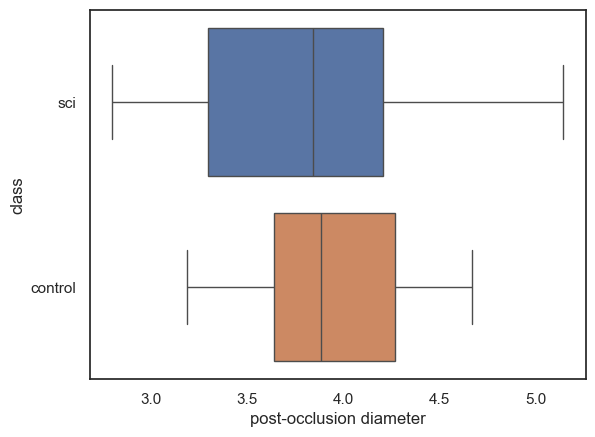

In [29]:
compare('post-occlusion diameter')

# Normality Test

In [30]:
normality = lambda column : print(f"Control: {sp.stats.normaltest(data[data['class'] == 'control'][column])}\nSCI: {sp.stats.normaltest(data[data['class'] == 'sci'][column])}")

In [31]:
normality('fmd')

Control: NormaltestResult(statistic=0.7617237613134554, pvalue=0.6832722562181283)
SCI: NormaltestResult(statistic=1.5065464916507387, pvalue=0.47082290863575704)


c:\Users\M315697\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\M315697\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
normality('ADFSCI tot')

Control: NormaltestResult(statistic=7.812748918008376, pvalue=0.020113290590838672)
SCI: NormaltestResult(statistic=6.4503619026814585, pvalue=0.039748588365073584)


In [33]:
normality('shear increase')

Control: NormaltestResult(statistic=3.2201723649745477, pvalue=0.1998703880056917)
SCI: NormaltestResult(statistic=1.8796929955378983, pvalue=0.39068780220516386)


In [34]:
normality('shear flat increase')

Control: NormaltestResult(statistic=0.23305232502071527, pvalue=0.8900068118596466)
SCI: NormaltestResult(statistic=2.3570545106596144, pvalue=0.30773161512955977)


In [35]:
normality('arterial peak time')

Control: NormaltestResult(statistic=1.428936884888462, pvalue=0.48945221468328237)
SCI: NormaltestResult(statistic=0.8621390457985946, pvalue=0.6498137322696268)


In [36]:
data

,subject,baseline diameter,post-occlusion diameter,fmd,class,arterial peak time,baseline shear,post-occlusion shear,shear flat increase,shear increase,...,UTI 1y,Bowel Prog time,PI hx,1y hosp,AD,AD -ADFSCI,OH,OH ADFSCI,ADFSCI tot,notes
0,ASCI005,4.733801,5.140481,8.590967,sci,102.096656,421.186000,630.070,208.884000,0.495942,...,2,55,2.0,1,yes,14.0,yes,5.0,19.0,NaN
1,ASCI006,2.810956,2.995261,6.556692,sci,72.260048,624.493333,753.570,129.076667,0.206690,...,4,52,1.0,1,yes,18.0,yes,13.0,31.0,NaN
2,ASCI007,3.485632,3.884266,11.436476,sci,50.833787,618.280000,1261.600,643.320000,1.040499,...,7,90,2.0,0,yes,90.0,yes,0.0,90.0,NaN
3,ASCI008,3.869011,4.285889,10.774792,sci,65.795438,490.977500,993.984,503.006500,1.024500,...,0,40,0.0,0,No,2.0,no,3.0,5.0,NaN
4,ASCI009,3.818209,3.843897,0.672763,sci,85.843417,635.041667,1229.460,594.418333,0.936030,...,0,45,0.0,0,yes,13.0,yes,5.0,18.0,NaN
5,ASCI010,3.252340,3.718008,14.317939,sci,79.521432,363.867500,827.108,463.240500,1.273102,...,0,90,0.0,0,yes,20.0,yes,23.0,43.0,NaN
6,ASCI011,3.934928,4.213032,7.067568,sci,60.404403,847.565000,771.628,-75.937000,-0.089594,...,0,60,1.0,0,yes,7.0,yes,5.0,12.0,NaN
7,ASCI012,3.107527,3.733968,20.158841,sci,54.875781,1087.577143,1560.320,472.742857,0.434675,...,0,30,0.0,0,no,5.0,no,2.0,7.0,NaN
8,ASCI013,4.378986,4.650184,6.193180,sci,97.270583,410.953750,525.148,114.194250,0.277876,...,0,75,0.0,0,yes,35.0,yes,11.0,46.0,NaN
9,ASCI014,3.289285,3.273312,-0.485611,sci,58.623520,1148.000000,1539.720,391.720000,0.341220,...,2,90,3.0,0,yes,91.0,yes,42.0,133.0,"had a lot of AD first year, 6 admissions for U..."


# adjusted fmd (bishoy thinks this is bogus)

Mann-Whitney U: 0.0005039013870345772
T-Test: 0.0001682313545252877
SCI: 4.81005185329672 +- 4.2458565751728905
Control: 12.1466138468034 +- 5.621158450200523


Text(0.5, 33.078125000000014, 'Adjusted Flow Mediated Dilation (%)')

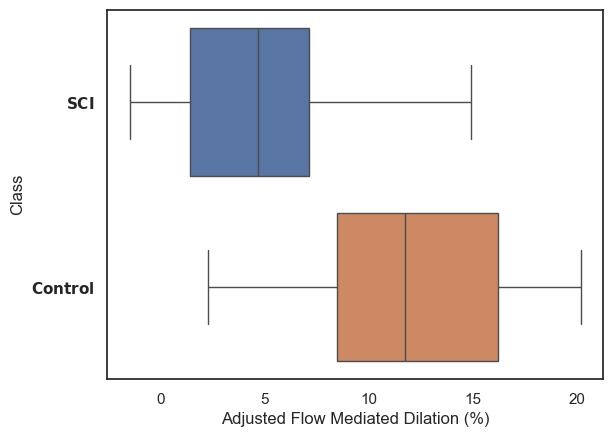

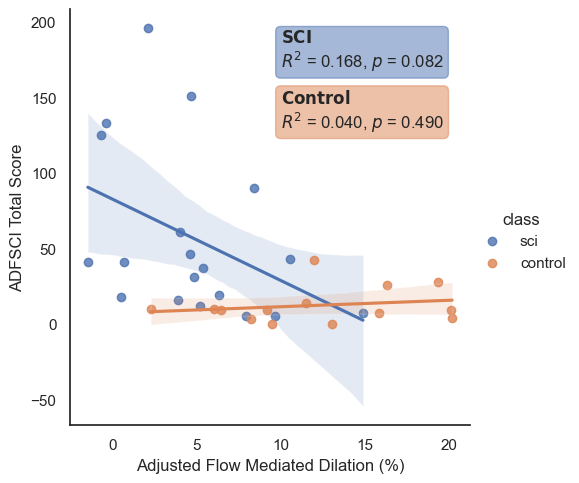

In [37]:
fmd = data['fmd'].copy()
fmd_shear = data['fmd']  / data['shear flat increase']

variance_explained = 0.262

result = fmd * (1- variance_explained) + variance_explained * fmd_shear
classes = data['class']

data['adjusted fmd'] = result

compare('adjusted fmd')
plt.ylabel("Class")
plt.yticks([0,1], [ "$\\bf {SCI}$", "$\\bf {Control}$"])
plt.xlabel('Adjusted Flow Mediated Dilation (%)')
sns.lmplot(data = data, x = 'adjusted fmd', y = 'ADFSCI tot', hue = 'class')

r_sci, p_sci = sp.stats.pearsonr(data[data['class'] == 'sci']['adjusted fmd'], data[data['class'] == 'sci']['ADFSCI tot'])
r_control, p_control = sp.stats.pearsonr(data[data['class'] == 'control']['adjusted fmd'], data[data['class'] == 'control']['ADFSCI tot'])


plt.annotate(coefficient_text("Control", r_control**2, p_control), xy = (10, 130), bbox = props('#dd8452'))
plt.annotate(coefficient_text("SCI", r_sci**2, p_sci), xy = (10, 170), bbox = props('#4c72b0'))
plt.ylabel('ADFSCI Total Score')
plt.xlabel('Adjusted Flow Mediated Dilation (%)')

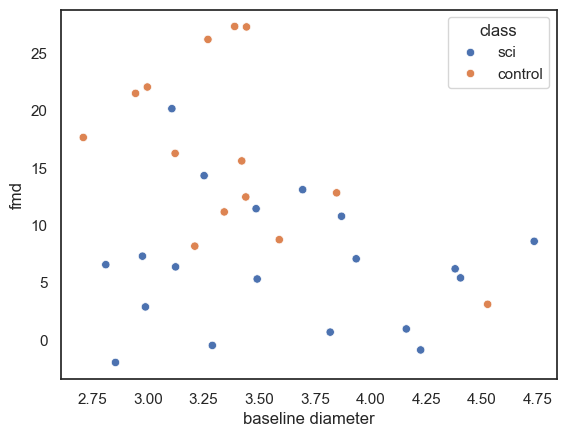

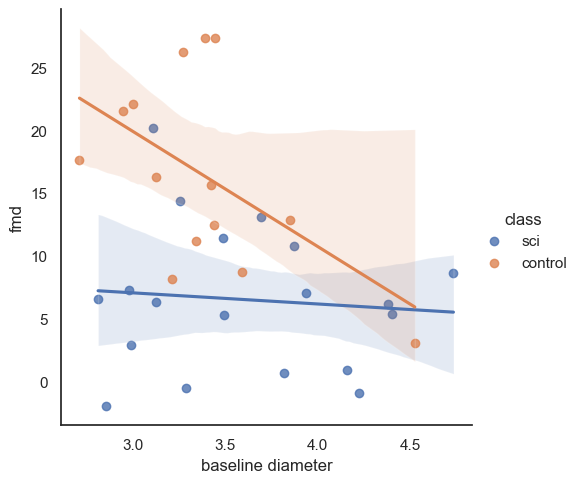

In [38]:
sns.scatterplot(data = data, x = 'baseline diameter', y = 'fmd', hue = 'class')
sns.lmplot(data = data, x = 'baseline diameter', y = 'fmd', hue = 'class')

# allometrically adjusted fmd (this is the one on the paper as of 8/2/2024) 

In [39]:
baseline = data[data['class'] == 'control']['baseline diameter'].to_numpy()
post = data[data['class'] == 'control']['post-occlusion diameter'].to_numpy()
flat = post - baseline
fmd = data[data['class'] == 'control']['fmd'].to_numpy()

In [40]:
baseline = data['baseline diameter'].to_numpy()
post = data['post-occlusion diameter'].to_numpy()
flat = post - baseline
fmd = data['fmd'].to_numpy()

Text(0, 0.5, 'ln(peak diameter)')

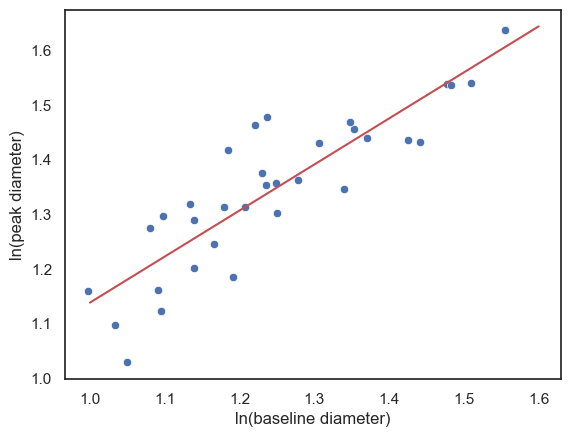

In [41]:
sns.scatterplot(x = np.log(baseline), y = np.log(post))
reg = np.polyfit(x = np.log(baseline), y = np.log(post), deg = 1)

reg_x = np.arange(1,1.6,0.2)
reg_y = reg[1] + reg_x * reg[0]

sns.lineplot(x = reg_x, y = reg_y, color = 'r')
plt.xlabel('ln(baseline diameter)')
plt.ylabel('ln(peak diameter)')

In [42]:
reg[0]

0.8410694846316619

In [43]:
fmd = data['fmd'].to_numpy()
baseline = data['baseline diameter'].to_numpy()
post = data['post-occlusion diameter'].to_numpy()
fmd = post / np.power(baseline, reg[0])
fmd -= 1
fmd

array([0.3902893 , 0.25579089, 0.35897811, 0.37349953, 0.24562482,
       0.37885296, 0.33110265, 0.43884988, 0.34285912, 0.20245569,
       0.27473441, 0.33404913, 0.27599124, 0.28449887, 0.39202048,
       0.224251  , 0.24624637, 0.15811045, 0.26620888, 0.3784587 ,
       0.54919   , 0.40559559, 0.44241208, 0.52339735, 0.31054751,
       0.3465483 , 0.30200059, 0.45308939, 0.36851772, 0.54585936,
       0.3975876 , 0.33226515, 0.39317496])

In [44]:
data['adjusted fmd'] = fmd*100

Text(46.96419921875001, 0.5, 'Adjusted Flow Mediated Dilation (%)')

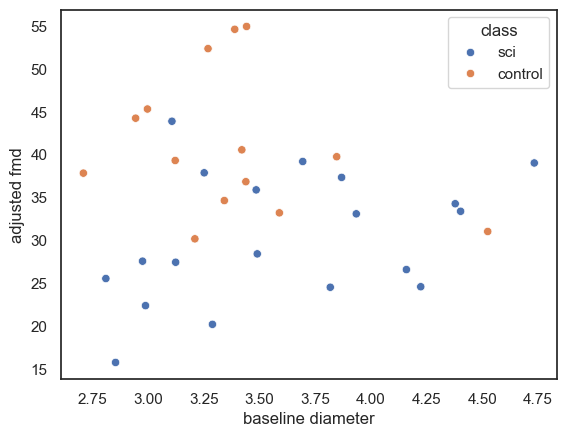

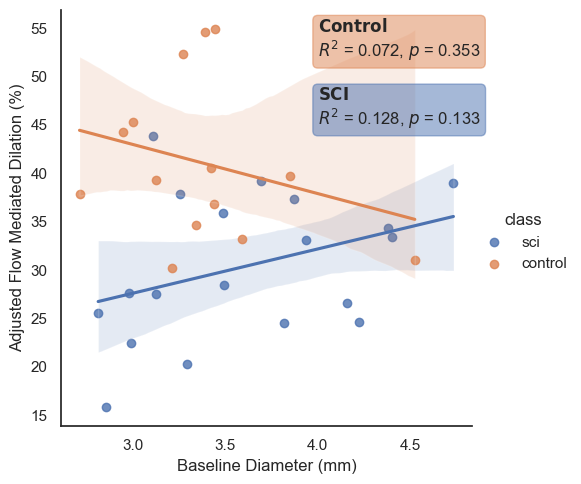

In [45]:
sns.scatterplot(data = data, x = 'baseline diameter', y = 'adjusted fmd', hue = 'class')
sns.lmplot(data = data, x = 'baseline diameter', y = 'adjusted fmd', hue = 'class')

r_sci, p_sci = sp.stats.pearsonr(data[data['class'] == 'sci']['adjusted fmd'], data[data['class'] == 'sci']['baseline diameter'])
r_control, p_control = sp.stats.pearsonr(data[data['class'] == 'control']['adjusted fmd'], data[data['class'] == 'control']['baseline diameter'])


plt.annotate(coefficient_text("Control", r_control**2, p_control), xy = (4, 52), bbox = props('#dd8452'))
plt.annotate(coefficient_text("SCI", r_sci**2, p_sci), xy = (4, 45), bbox = props('#4c72b0'))
plt.xlabel('Baseline Diameter (mm)')
plt.ylabel('Adjusted Flow Mediated Dilation (%)')

Mann-Whitney U: 0.001265491839136932
T-Test: 0.0005074248878533193
SCI: 30.39165150027654 +- 7.470411434459806
Control: 41.061744915088575 +- 8.245659012284268


Text(0.5, 1.0, 'Allometrically Scaled Flow Mediated Dilation')

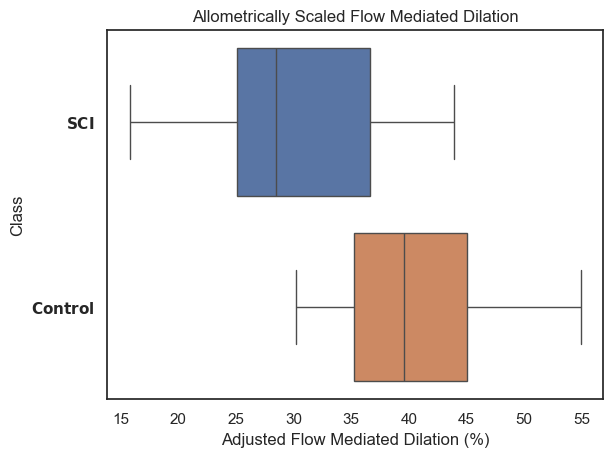

In [46]:
compare('adjusted fmd')
plt.ylabel("Class")
plt.yticks([0,1], [ "$\\bf {SCI}$", "$\\bf {Control}$"])
plt.xlabel('Adjusted Flow Mediated Dilation (%)')
plt.title('Allometrically Scaled Flow Mediated Dilation')

Text(0.5, 33.078125000000014, 'Adjusted Flow Mediated Dilation (%)')

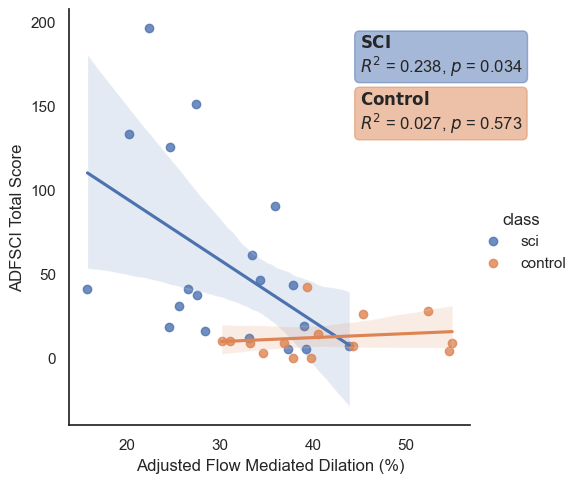

In [49]:
sns.lmplot(data = data, x = 'adjusted fmd', y = 'ADFSCI tot', hue = 'class')

r_sci, p_sci = sp.stats.pearsonr(data[data['class'] == 'sci']['adjusted fmd'], data[data['class'] == 'sci']['ADFSCI tot'])
r_control, p_control = sp.stats.pearsonr(data[data['class'] == 'control']['adjusted fmd'], data[data['class'] == 'control']['ADFSCI tot'])

plt.annotate(coefficient_text("Control", r_control**2, p_control), xy = (45, 136), bbox = props('#dd8452'))
plt.annotate(coefficient_text("SCI", r_sci**2, p_sci), xy = (45, 170), bbox = props('#4c72b0'))
plt.ylabel('ADFSCI Total Score')
plt.xlabel('Adjusted Flow Mediated Dilation (%)')

In [48]:
data.to_csv('master_subject_data.csv', index = False)